In [2]:
import numpy as np
import gym
import torch
import matplotlib.pyplot as plt
from DQN_problem import dqn, running_average, Agent
import matplotlib
import matplotlib.animation as animation
import plotly.graph_objects as go
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

c:\Users\frede\OneDrive\Documents\KTH_2022_2023\EL2805_RL\Labs\lab2\el2805_lab2_instructions_2022\rl_lab2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Parameters
N_episodes = 500                                # Number of episodes
discount_factor = 0.99                           # Value of the discount factor
n_ep_running_average = 50                        # Running average of 50 episodes
batch_size = 32                                  # Batch size
buffer_size = 10_000                             # Buffer size
alpha = 5e-4                                     # Learning rate for the network
# alpha = 0.000239                                 # Learning rate for the network
epsilon_max = 0.99                               # Exploration parameter
epsilon_min = 0.05                               # Exploration parameter
seed = 42                                        # Random seed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
buffer_size = 50000                             # Buffer size



In [14]:
episode_reward_list, episode_number_of_steps = dqn(N_episodes=N_episodes, discount_factor=discount_factor, n_ep_running_average=n_ep_running_average, batch_size=batch_size, buffer_size=buffer_size, alpha=alpha, epsilon_max=epsilon_max, epsilon_min=epsilon_min, seed=seed, device=device)

Episode 499 - Reward/Steps: 285.2/423 - Avg. Reward/Steps: 216.8/365.738: 100%|██████████| 500/500 [10:36<00:00,  1.27s/it]             


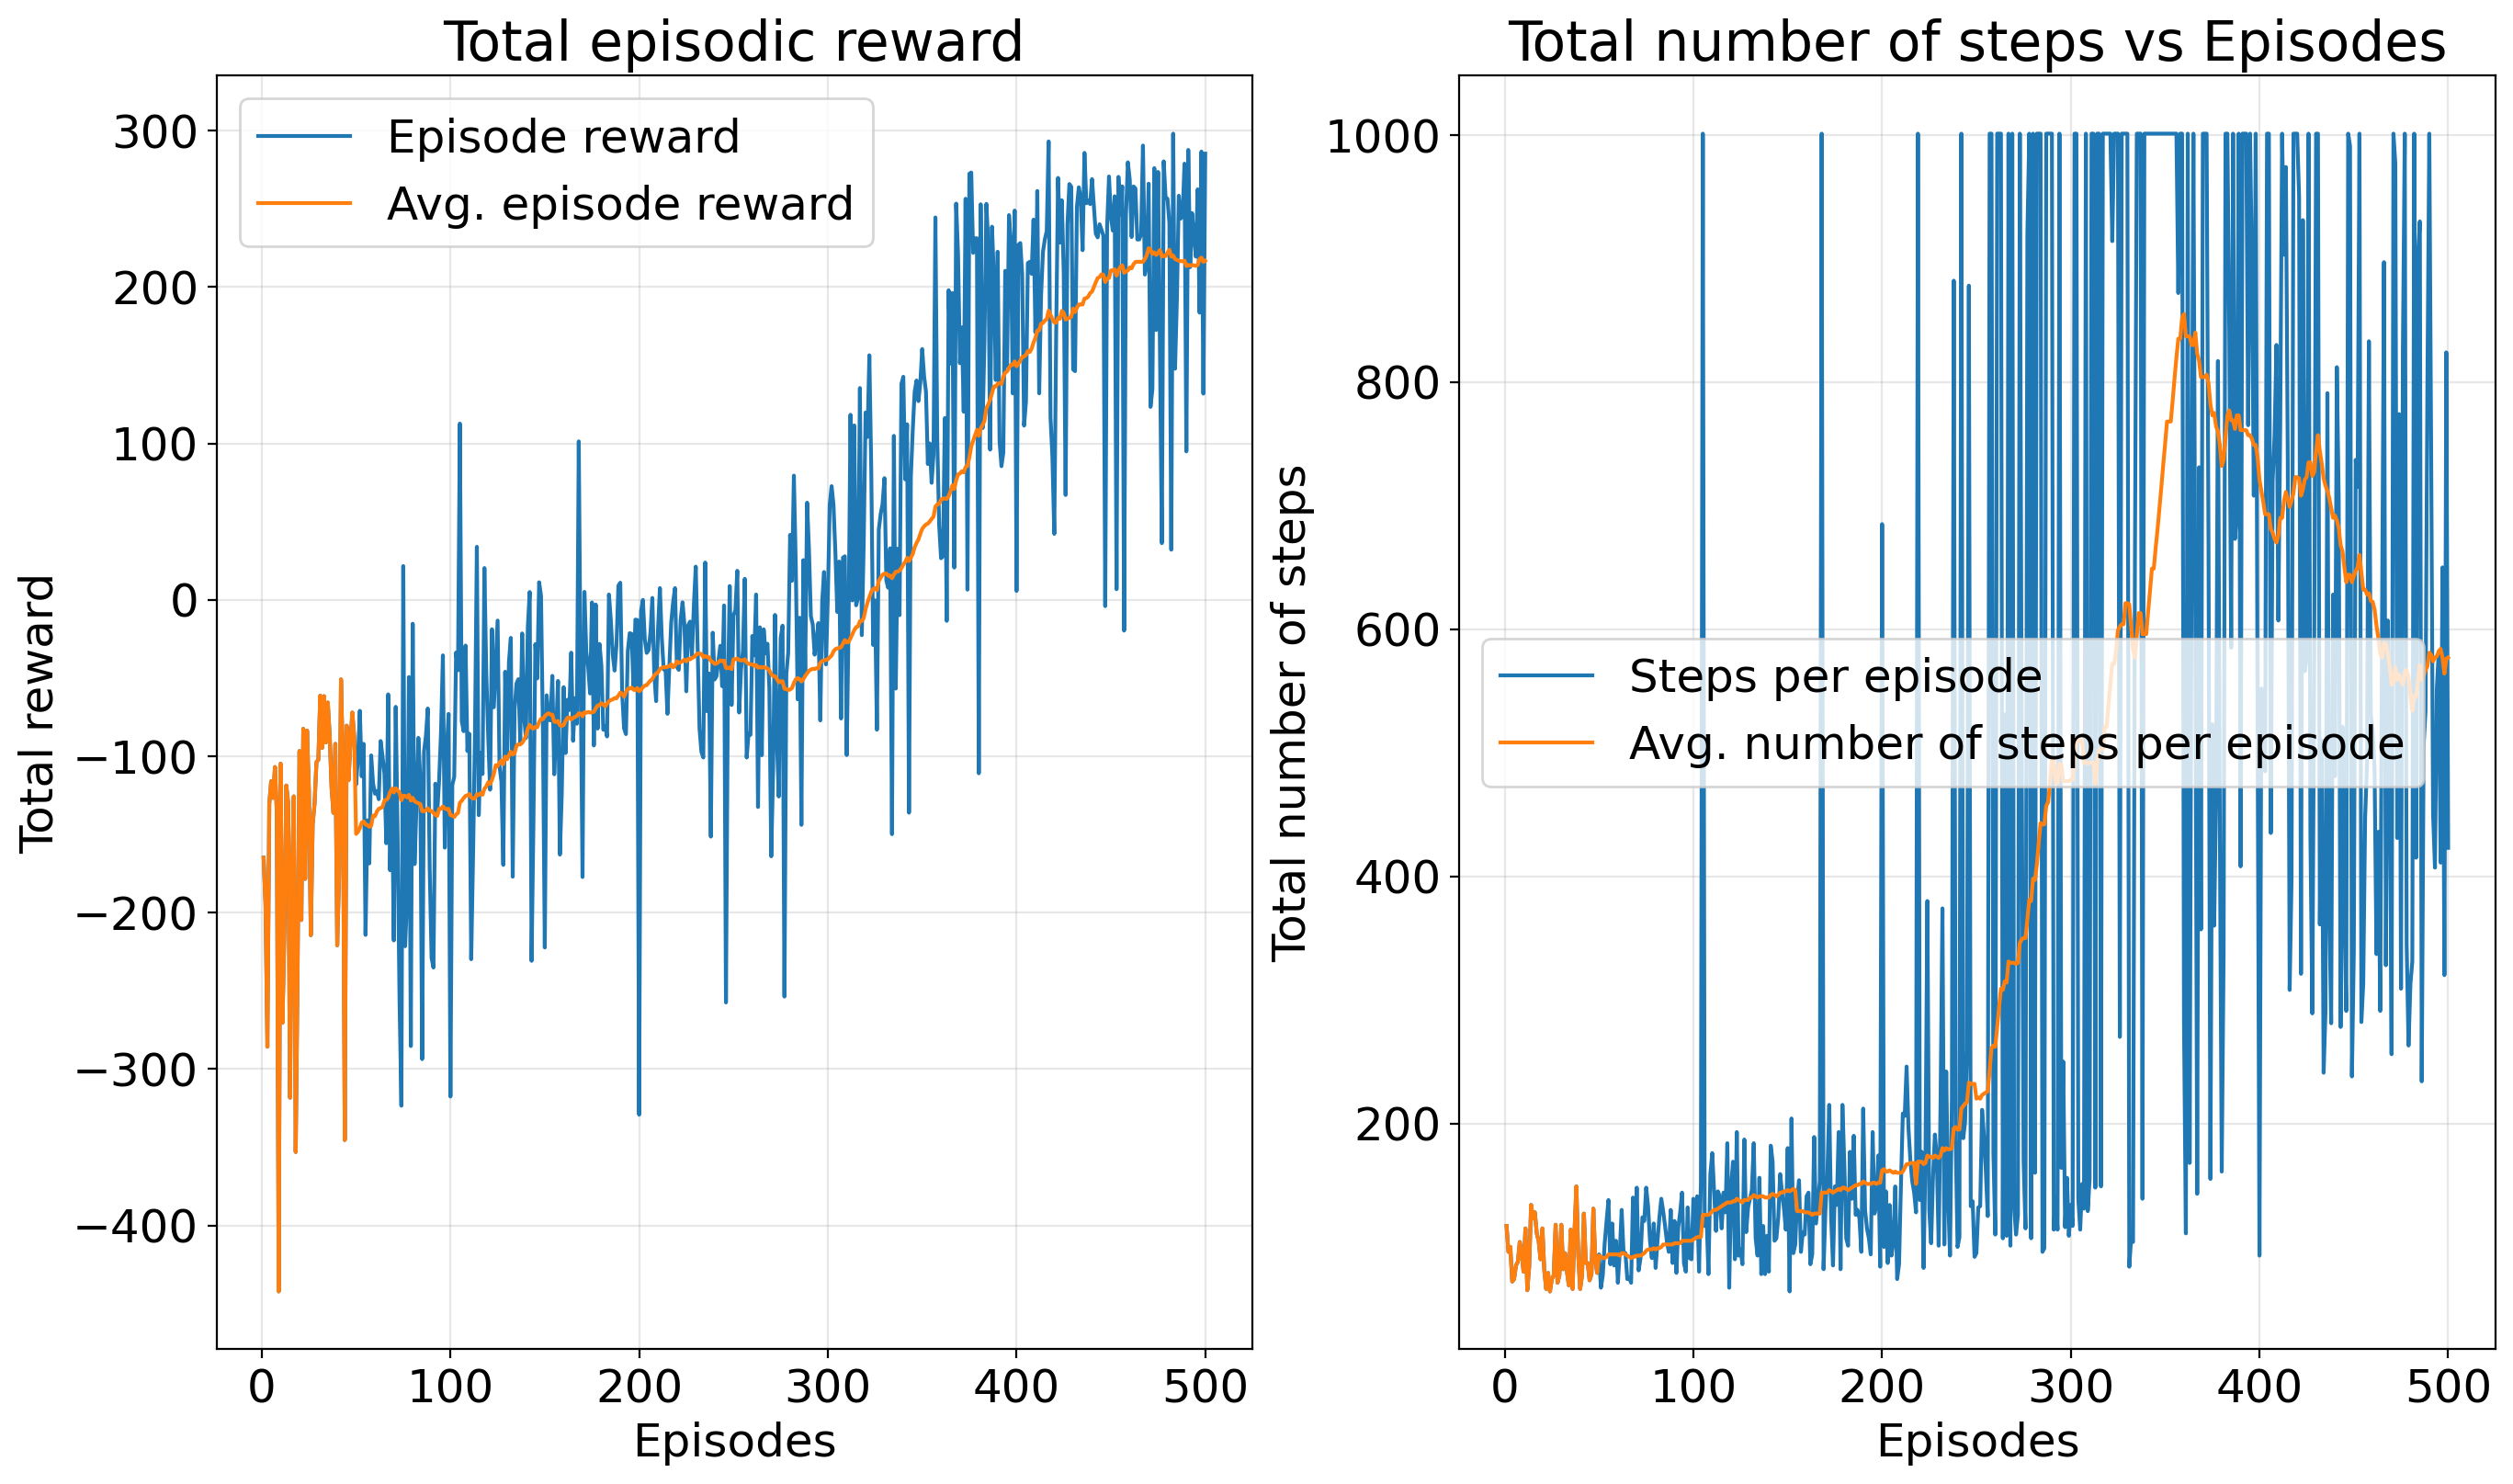

In [18]:
matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
ax[0].plot([i for i in range(1, N_episodes+1)], episode_reward_list, label='Episode reward')
ax[0].plot([i for i in range(1, N_episodes+1)], running_average(
    episode_reward_list, n_ep_running_average), label ='Avg. episode reward')
ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Total reward')
ax[0].set_title('Total episodic reward')
ax[0].legend()
ax[0].grid(alpha=0.3)

ax[1].plot([i for i in range(1, N_episodes+1)], episode_number_of_steps, label='Steps per episode')
ax[1].plot([i for i in range(1, N_episodes+1)], running_average(
    episode_number_of_steps, n_ep_running_average), label='Avg. number of steps per episode')
ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Total number of steps')
ax[1].set_title('Total number of steps vs Episodes')
ax[1].legend()
ax[1].grid(alpha=0.3)
plt.show()

In [10]:

def vectorized_Q(X, Y, Q):
    Z = np.zeros(shape=(X.shape[0], Y.shape[0]))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            state = torch.tensor(np.array([0, x, 0, 0, y, 0, 0, 0]), dtype=torch.float32, requires_grad=False)
            Z[i, j] = torch.argmax(Q(state))
    return Z

Q = torch.load("neural-network.pth")

X = np.linspace(0., 1.5, 100)
Y = np.linspace(-np.pi, np.pi, 100)
Z = vectorized_Q(X, Y, Q) 
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'global_value_function',
    'height': 500,
    'width': 700,
    'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

z = Z
x, y = X, Y
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])

fig.update_layout(scene = dict(
                    xaxis_title='Height ',
                    yaxis_title='Angle (rad)',
                    zaxis_title='Value of the optimal policy'),
                    title='Value function of the optimal policy',
                    width=700,
                    margin=dict(pad=150, t=50, b=0),
                    yaxis=dict(
                    titlefont=dict(size=80)),
                    font=dict( size=15),
                    scene_camera=dict(eye=dict(x=0., y=0., z=2)
                    ))

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                highlightcolor="limegreen", project_z=False))
fig.show(config=config)


In [25]:
Q(torch.zeros(size=(8,)))

tensor([34.7175, 34.1321, 31.2500, 34.9600], grad_fn=<AddBackward0>)

In [26]:
torch.zeros(size=(8,))

tensor([0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
episode_reward_list, episode_number_of_steps = dqn(N_episodes, discount_factor, n_ep_running_average, batch_size, buffer_size, update_frequency, alpha, epsilon_max, epsilon_min, hidden_size)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
ax[0].plot([i for i in range(1, N_episodes+1)], episode_reward_list, label='Episode reward')
ax[0].plot([i for i in range(1, N_episodes+1)], running_average(
    episode_reward_list, n_ep_running_average), label='Avg. episode reward')
ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Total reward')
ax[0].set_title(str(discount_factor) + "max : " + str(max(running_average(
    episode_reward_list, n_ep_running_average)[52:])))
ax[0].legend()
ax[0].grid(alpha=0.3)

ax[1].plot([i for i in range(1, N_episodes+1)], episode_number_of_steps, label='Steps per episode')
ax[1].plot([i for i in range(1, N_episodes+1)], running_average(
    episode_number_of_steps, n_ep_running_average), label='Avg. number of steps per episode')
ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Total number of steps')
ax[1].set_title('Total number of steps vs Episodes')
ax[1].legend()
ax[1].grid(alpha=0.3)
plt.show()

In [5]:
import gym
from gym import wrappers
import matplotlib.pyplot as plt
import io
import base64
from IPython.display import HTML
import ffmpeg

In [7]:
env = gym.make('LunarLander-v2')
env.seed(3)
env = wrappers.Monitor(env, "./gym-results", force=True)
env.reset()


agent = Agent(
    n_actions=4,
    n_states=8,
    seed=seed,
    alpha=alpha,
    buffer_size=buffer_size,
    batch_size=batch_size,
    device=device
)

# load the weights from file
agent.main_qnetwork = torch.load('neural-network.pth')

state = torch.from_numpy(np.array([0., 0.75, 0., 0., 0., 0., 0., 0.])).float()

for j in range(1000):
    action = agent.action(state, epsilon=0)
    state, reward, done, _ = env.step(action)
    if done: break

env.close()

KeyboardInterrupt: 

In [5]:
env = wrap_env(gym.make("LunarLander-v2"))
observation = env.reset()
while True:
  env.render()
  action, _states = model.predict(observation, deterministic=True)
  observation, reward, done, info = env.step(action)
  if done:
    break;

env.close()
show_video()